In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('E:\\itsstudytym\\Deep Learning with NLP CV\\Customer Exit Prediction from Bank using ANN\\Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [5]:
geo = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
X = X.drop(['Geography','Gender'],axis=1)
X = pd.concat([X,geo,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Feature Scaling using StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ReLU
from keras.layers import Dropout

Using TensorFlow backend.


#### Add First Input Layer

In [10]:
ann = Sequential()
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

#### Add Hidden Second Layer

In [11]:
ann.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

#### Add Output Layer

In [12]:
ann.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#### Compiling ANN

In [13]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Fitting ANN

In [14]:
result = ann.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Train on 5024 samples, validate on 2476 samples
Epoch 1/10
5024/5024 [==============================] - 2s 369us/step - loss: 0.7811 - accuracy: 0.5864 - val_loss: 0.5127 - val_accuracy: 0.7977
Epoch 2/10
5024/5024 [==============================] - 1s 190us/step - loss: 0.4874 - accuracy: 0.7966 - val_loss: 0.4638 - val_accuracy: 0.8013
Epoch 3/10
5024/5024 [==============================] - 1s 183us/step - loss: 0.4481 - accuracy: 0.8065 - val_loss: 0.4400 - val_accuracy: 0.8126
Epoch 4/10
5024/5024 [==============================] - 1s 178us/step - loss: 0.4273 - accuracy: 0.8151 - val_loss: 0.4287 - val_accuracy: 0.8150
Epoch 5/10
5024/5024 [==============================] - 1s 184us/step - loss: 0.4121 - accuracy: 0.8195 - val_loss: 0.4158 - val_accuracy: 0.8195
Epoch 6/10
5024/5024 [==============================] - 1s 289us/step - loss: 0.3974 - accuracy: 0.8292 - val_loss: 0.4019 - val_accuracy: 0.8279
Epoch 7/10
5024/5024 [==============================] - 1s 223us/step - loss

In [15]:
result2 = ann.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Train on 5024 samples, validate on 2476 samples
Epoch 1/50
5024/5024 [==============================] - 1s 200us/step - loss: 0.3466 - accuracy: 0.8551 - val_loss: 0.3667 - val_accuracy: 0.8494
Epoch 2/50
5024/5024 [==============================] - 1s 183us/step - loss: 0.3446 - accuracy: 0.8553 - val_loss: 0.3645 - val_accuracy: 0.8494
Epoch 3/50
5024/5024 [==============================] - 1s 172us/step - loss: 0.3423 - accuracy: 0.8585 - val_loss: 0.3638 - val_accuracy: 0.8534
Epoch 4/50
5024/5024 [==============================] - 1s 198us/step - loss: 0.3402 - accuracy: 0.8589 - val_loss: 0.3638 - val_accuracy: 0.8538
Epoch 5/50
5024/5024 [==============================] - 1s 216us/step - loss: 0.3389 - accuracy: 0.8609 - val_loss: 0.3631 - val_accuracy: 0.8554
Epoch 6/50
5024/5024 [==============================] - 1s 173us/step - loss: 0.3385 - accuracy: 0.8591 - val_loss: 0.3648 - val_accuracy: 0.8538
Epoch 7/50
5024/5024 [==============================] - 1s 173us/step - loss

In [16]:
print(result.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


#### Summarize Accuracy

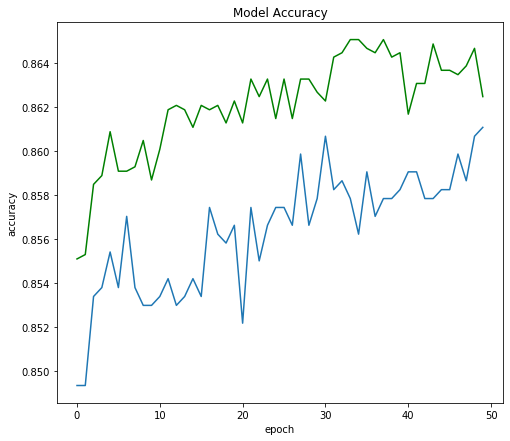

In [17]:
plt.figure(figsize=(8,7))
plt.plot(result2.history['accuracy'],color='green')
plt.plot(result2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Summarize Loss

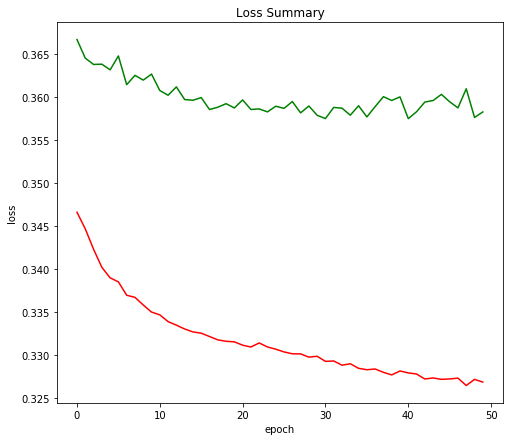

In [18]:
plt.figure(figsize=(8,7))
plt.plot(result2.history['loss'],color='red')
plt.plot(result2.history['val_loss'],color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Summary')
plt.show()

### Predict using Fit Model

In [19]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


### Evaluating Model

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1917   74]
 [ 269  240]]


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8628
